In [2]:
from __future__ import division
import sys
import os
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import pandas as pd
from concurrent.futures import ProcessPoolExecutor, wait
from scipy import optimize as sco
from glob import glob
import re
from matplotlib.colors import LogNorm

In [3]:
data_tc0 = np.load('/fastio2/dasha/double_pulse/data_CC_NuTau_1_1.npy',mmap_mode='r')
data_tn0 = np.load('/fastio2/dasha/double_pulse/data_CC_NuTau_2_1.npy',mmap_mode='r')
data_mc0 = np.load('/fastio2/dasha/double_pulse/data_CC_NuMu_1_1.npy',mmap_mode='r')
data_mn0 = np.load('/fastio2/dasha/double_pulse/data_CC_NuMu_2_1.npy',mmap_mode='r')
data_ec0 = np.load('/fastio2/dasha/double_pulse/data_CC_NuE_1_1.npy',mmap_mode='r')
data_en0 = np.load('/fastio2/dasha/double_pulse/data_CC_NuE_2_1.npy',mmap_mode='r')
data_eg0 = np.load('/fastio2/dasha/double_pulse/data_CC_NuE_3_1.npy',mmap_mode='r')
data_c0 = np.load('/fastio2/dasha/double_pulse/data_MuonGun_all.npy',mmap_mode='r')

In [4]:
print(data_tc0.shape,data_tn0.shape,data_mc0.shape,data_mn0.shape,data_ec0.shape,data_en0.shape,data_eg0.shape,data_c0.shape)

(128278,) (27754,) (462405,) (54601,) (420185,) (72626,) (4267,) (246367,)


In [5]:
count = 0
for i in data_mn0:
    if np.any([np.isnan(val) for val in [i['logan_veto']['SPE_rlogl'],i['logan_veto']['Cascade_rlogl']]]):
        print(i['logan_veto'])
        count += 1
print(data_mn0.shape,count)

(nan, -173.09099, nan, -142.1889, -63.62, -78.12217, 109.530914)
(54601,) 1


In [6]:
data_tc0 = data_tc0[np.isfinite(data_tc0['logan_veto']['SPE_rlogl']) & np.isfinite(data_tc0['logan_veto']['Cascade_rlogl'])]
data_tn0 = data_tn0[np.isfinite(data_tn0['logan_veto']['SPE_rlogl']) & np.isfinite(data_tn0['logan_veto']['Cascade_rlogl'])]
data_mc0 = data_mc0[np.isfinite(data_mc0['logan_veto']['SPE_rlogl']) & np.isfinite(data_mc0['logan_veto']['Cascade_rlogl'])]
data_mn0 = data_mn0[np.isfinite(data_mn0['logan_veto']['SPE_rlogl']) & np.isfinite(data_mn0['logan_veto']['Cascade_rlogl'])]
data_ec0 = data_ec0[np.isfinite(data_ec0['logan_veto']['SPE_rlogl']) & np.isfinite(data_ec0['logan_veto']['Cascade_rlogl'])]
data_en0 = data_en0[np.isfinite(data_en0['logan_veto']['SPE_rlogl']) & np.isfinite(data_en0['logan_veto']['Cascade_rlogl'])]
data_eg0 = data_eg0[np.isfinite(data_eg0['logan_veto']['SPE_rlogl']) & np.isfinite(data_eg0['logan_veto']['Cascade_rlogl'])]
data_c0 = data_c0[np.isfinite(data_c0['logan_veto']['SPE_rlogl']) & np.isfinite(data_c0['logan_veto']['Cascade_rlogl'])]

In [7]:
print(data_tc0.shape,data_tn0.shape,data_mc0.shape,data_mn0.shape,data_ec0.shape,data_en0.shape,data_eg0.shape,data_c0.shape)

(128277,) (27754,) (462404,) (54600,) (420181,) (72624,) (4267,) (246367,)


In [8]:
LLH = -0.1
Qst1 = 2000
Qst2 = 10
Qst3 = 10
NET2 =0.98

maskl_tc = data_tc0['logan_veto']['SPE_rlogl']-data_tc0['logan_veto']['Cascade_rlogl'] > LLH
maskl_tn = data_tn0['logan_veto']['SPE_rlogl']-data_tn0['logan_veto']['Cascade_rlogl'] > LLH 
maskl_mc = data_mc0['logan_veto']['SPE_rlogl']-data_mc0['logan_veto']['Cascade_rlogl'] > LLH
maskl_mn = data_mn0['logan_veto']['SPE_rlogl']-data_mn0['logan_veto']['Cascade_rlogl'] > LLH 
maskl_ec = data_ec0['logan_veto']['SPE_rlogl']-data_ec0['logan_veto']['Cascade_rlogl'] > LLH
maskl_en = data_en0['logan_veto']['SPE_rlogl']-data_en0['logan_veto']['Cascade_rlogl'] > LLH 
maskl_eg = data_eg0['logan_veto']['SPE_rlogl']-data_eg0['logan_veto']['Cascade_rlogl'] > LLH 
maskl_c = data_c0['logan_veto']['SPE_rlogl']-data_c0['logan_veto']['Cascade_rlogl'] > LLH

maskq_tc = (data_tc0['qst']['q'][:,0] >= Qst1) & (data_tc0['qst']['q'][:,1] >= Qst2) & (data_tc0['qst']['q'][:,2] >= Qst3)
maskq_tn = (data_tn0['qst']['q'][:,0] >= Qst1) & (data_tn0['qst']['q'][:,1] >= Qst2) & (data_tn0['qst']['q'][:,2] >= Qst3)
maskq_mc = (data_mc0['qst']['q'][:,0] >= Qst1) & (data_mc0['qst']['q'][:,1] >= Qst2) & (data_mc0['qst']['q'][:,2] >= Qst3)
maskq_mn = (data_mn0['qst']['q'][:,0] >= Qst1) & (data_mn0['qst']['q'][:,1] >= Qst2) & (data_mn0['qst']['q'][:,2] >= Qst3) 
maskq_ec = (data_ec0['qst']['q'][:,0] >= Qst1) & (data_ec0['qst']['q'][:,1] >= Qst2) & (data_ec0['qst']['q'][:,2] >= Qst3)
maskq_en = (data_en0['qst']['q'][:,0] >= Qst1) & (data_en0['qst']['q'][:,1] >= Qst2) & (data_en0['qst']['q'][:,2] >= Qst3)
maskq_eg = (data_eg0['qst']['q'][:,0] >= Qst1) & (data_eg0['qst']['q'][:,1] >= Qst2) & (data_eg0['qst']['q'][:,2] >= Qst3) 
maskq_c = (data_c0['qst']['q'][:,0] >= Qst1) & (data_c0['qst']['q'][:,1] >= Qst2) & (data_c0['qst']['q'][:,2] >= Qst3)

maskn2_tc = (data_tc0['preds']['n2_1'] >= NET2) 
maskn2_tn = (data_tn0['preds']['n2_1'] >= NET2) 
maskn2_mc = (data_mc0['preds']['n2_1'] >= NET2) 
maskn2_mn = (data_mn0['preds']['n2_1'] >= NET2) 
maskn2_ec = (data_ec0['preds']['n2_1'] >= NET2)
maskn2_en = (data_en0['preds']['n2_1'] >= NET2)
maskn2_eg = (data_eg0['preds']['n2_1'] >= NET2) 
maskn2_c =  (data_c0['preds']['n2_1'] >= NET2) 

mask_tc = maskl_tc & maskq_tc & maskn2_tc
mask_tn = maskl_tn & maskq_tn & maskn2_tn
mask_mc = maskl_mc & maskq_mc & maskn2_mc
mask_mn = maskl_mn & maskq_mn & maskn2_mn
mask_ec = maskl_ec & maskq_ec & maskn2_ec
mask_en = maskl_en & maskq_en & maskn2_en
mask_eg = maskl_eg & maskq_eg & maskn2_eg
mask_c = maskl_c & maskq_c & maskn2_c

data_tc = data_tc0[mask_tc]
data_tn = data_tn0[mask_tn]
data_mc = data_mc0[mask_mc]
data_mn = data_mn0[mask_mn]
data_ec = data_ec0[mask_ec]
data_en = data_en0[mask_en]
data_eg = data_eg0[mask_eg]
data_c = data_c0[mask_c]

In [9]:
print(data_tc.shape,data_tn.shape,data_mc.shape,data_mn.shape,data_ec.shape,data_en.shape,data_eg.shape,data_c.shape)

(47632,) (10720,) (29392,) (20916,) (189942,) (28719,) (2097,) (3748,)


In [10]:
NET1 = 0.99
NET3 = 0.8
masks_tc = (data_tc['preds']['n1'] >= NET1) & (data_tc['preds']['n3'] >= NET3) 
masks_tn = (data_tn['preds']['n1'] >= NET1) & (data_tn['preds']['n3'] >= NET3) 
masks_mc = (data_mc['preds']['n1'] >= NET1) & (data_mc['preds']['n3'] >= NET3) 
masks_mn = (data_mn['preds']['n1'] >= NET1) & (data_mn['preds']['n3'] >= NET3) 
masks_ec = (data_ec['preds']['n1'] >= NET1) & (data_ec['preds']['n3'] >= NET3) 
masks_en = (data_en['preds']['n1'] >= NET1) & (data_en['preds']['n3'] >= NET3) 
masks_eg = (data_eg['preds']['n1'] >= NET1) & (data_eg['preds']['n3'] >= NET3) 
masks_c = (data_c['preds']['n1'] >= NET1) & (data_c['preds']['n3'] >= NET3)

data_tc = data_tc[masks_tc]
data_tn = data_tn[masks_tn]
data_mc = data_mc[masks_mc]
data_mn = data_mn[masks_mn]
data_ec = data_ec[masks_ec]
data_en = data_en[masks_en]
data_eg = data_eg[masks_eg]
data_c = data_c[masks_c]

In [11]:
print(data_tc.shape,data_tn.shape,data_mc.shape,data_mn.shape,data_ec.shape,data_en.shape,data_eg.shape,data_c.shape)

(8848,) (56,) (413,) (123,) (84,) (70,) (22,) (316,)


In [12]:
secs_per_year = 31536000
years = 10

In [11]:
sig = sum(data_tc['weight_val']*secs_per_year*years)
bkg =  sum(data_tn['weight_val']*secs_per_year*years)+sum(data_mc['weight_val']*secs_per_year*years)+\
 sum(data_mn['weight_val']*secs_per_year*years)+ sum(data_ec['weight_val']*secs_per_year*years)+\
 sum(data_en['weight_val']*secs_per_year*years)+ sum(data_eg['weight_val']*secs_per_year*years)+\
 sum(data_c['weight_val']*secs_per_year*years)
print(sig,bkg)

7.446005657215657 1.1138493511777283


In [13]:
class BinnedPoissonLikelihood():
    '''
    Likelihood: Binned Poisson
    Model: P_B(x) + lmd_S * P_S(x)
    '''
    def __init__(self, sig, bkg, random_state):
        self.sig = sig
        self.bkg = bkg
        self.random_state = random_state

    def log_likelihood(self, lmd, data):
        expected = self.bkg + lmd * self.sig
        result =  data * np.log(expected) - expected
        return -result

    def test_statistic(self, lmd, data):
        expected = self.bkg + lmd * self.sig
        null = self.bkg
        result = data * (np.log(expected) - np.log(null)) - expected + null
        return -result
    
    def test_statistic_best(self, lmd, true_lmd, data):
        expected = self.bkg + lmd * self.sig
        null = self.bkg + true_lmd * self.sig
        result = data * (np.log(expected) - np.log(null)) - expected + null
        return -result
    
    def fit_lmd(self, data):
        pars = [0.5]
        par_bounds = [(0, 100)]

        xmin, fmin, min_dict = sco.fmin_l_bfgs_b(
            func=self.test_statistic,
            x0=pars,
            bounds=par_bounds,
            args=(data,),
            approx_grad=True
        )

        # set up mindict to enter while, exit if fit looks nice
        i = 1
        while min_dict["warnflag"] == 2 or b'FACTR' in min_dict["task"]:
            if i > 100:
                print("Did not manage good fit")
                print('results are {}, {}'.format(fmin, xmin))
                return fmin, xmin

            pars[0] = self.random_state.uniform(0., 1.)

            # no stop due to gradient
            xmin, fmin, min_dict = sco.fmin_l_bfgs_b(
                func=self.test_statistic,
                x0=pars,
                bounds=par_bounds,
                args=(data,),
                approx_grad=True
            )
            i += 1

        return fmin, xmin
    
    def fit_lmd_best(self, true_lmd, data):
        pars = [0.5]
        par_bounds = [(0, 100)]

        xmin, fmin, min_dict = sco.fmin_l_bfgs_b(
            func=self.test_statistic_best,
            x0=pars,
            bounds=par_bounds,
            args=(true_lmd, data,),
            approx_grad=True
        )
        i = 1
        while min_dict["warnflag"] == 2 or b'FACTR' in min_dict["task"]:
            if i > 100:
                print("Did not manage good fit")
                print('results are {}, {}'.format(fmin, xmin))
                return fmin, xmin

            pars[0] = self.random_state.uniform(0., 1.)

            # no stop due to gradient
            xmin, fmin, min_dict = sco.fmin_l_bfgs_b(
                func=self.test_statistic_best,
                x0=pars,
                bounds=par_bounds,
                args=(true_lmd, data,),
                approx_grad=True
            )
            i += 1

        return fmin, xmin

In [14]:
class SignalInjector(object):
    def __init__(self, sig, bkg, random_state, sig_exp=None, bkg_exp=None):
        if sig_exp is not None:
            self.sig_exp = sig_exp
        else:
            self.sig = sig
            
        if bkg_exp is not None:
            self.bkg_exp = bkg_exp
        else:
            self.bkg_exp = bkg

        self.sig = sig
        self.bkg = bkg
        self.random_state = random_state

    def calc_n_trials(self, n_trials):
        n_sig_trials = self.random_state.poisson(lam=self.sig_exp, size=n_trials)
        n_bkg_trials = self.random_state.poisson(lam=self.bkg_exp, size=n_trials)
        return n_sig_trials, n_bkg_trials

    def return_samples(self, n_trials):
        self.n_sig_per_trial, self.n_bkg_per_trial = \
            self.calc_n_trials(n_trials)

        return  self.n_sig_per_trial + self.n_bkg_per_trial
    
    def do_trials(self, n_trials, llh):
        self.sig_trials, self.bkg_trials = self.calc_n_trials(n_trials)
        
        ts_vals = []
        lmds = []
        true_lmd = self.sig_exp / float(np.sum(self.sig))
        
        for i in range(n_trials):
            samples = (self.sig_trials[i] + self.bkg_trials[i])
            ts, lmd = llh.fit_lmd_best(true_lmd, samples)
            ts_vals.append(-ts)
            lmds.extend(lmd)
        return ts_vals, lmds

In [15]:
def scan_neyman_row(sig_inj, n_samples, likelihood, mu):
    sig_ts,_ = sig_inj.do_trials(
        n_samples, likelihood)
    sig_ts = np.array(sig_ts)
    sig_ts[sig_ts < 0] = 0
    return sig_ts, mu

def scan_neyman_plane(sig, bkg, bkg_exp, mu_bins, ts_bins, n_samples_per_mu, n_jobs=2, save=False, out_path=None):
    def save_stuff(out_path, hist, mu):
        if out_path is not None:
            out_path1 = os.path.join(out_path, 'ts_mu_{}.npz'.format(mu_i))
            np.savez(out_path1, hist)

    if not save:
        hists = np.zeros((len(mu_bins), len(ts_bins) - 1))
        
    random_state = np.random.RandomState(42)
    likelihood = BinnedPoissonLikelihood(sig, bkg, random_state=random_state)

    if n_jobs > 1:
        with ProcessPoolExecutor(max_workers=n_jobs) as executor:
            futures = []
            for i, mu_i in enumerate(mu_bins):
                injector_rs = np.random.RandomState(i)
                sig_inj = SignalInjector(sig, bkg, injector_rs, sig_exp=mu_i, bkg_exp=bkg_exp)
                futures.append(
                    executor.submit(
                        scan_neyman_row,
                        sig_inj=sig_inj,
                        n_samples=n_samples_per_mu,
                        likelihood=likelihood,
                        mu=mu_i))
            results = wait(futures)
            
        for i, future_i in enumerate(results.done):
            try:
                sig_ts, mu_i = future_i.result()
            except Exception as exc:
                print('%r generated an exception: %s' % (future_i, exc))
          
            hist, ts_e = np.histogram(sig_ts, bins=ts_bins)
            hist = hist / float(np.sum(hist))
            if not save:
                hists[idx] = hist
            else:
                save_stuff(out_path, sig_ts, mu_i)
                
    if not save:
        return hists, ts_e
    else:
        return 0, 0

In [32]:
n_jobs=100
n_samples=100000
mu_bins = np.linspace(0, 25, 1001)
ts_bins = np.linspace(0, 200, 2001)
ts_bins = ts_bins - np.diff(ts_bins)[0] / 2.
out_path ="/home/dup193/work/double_pulse/onebin_test/ts_dist/"

#hists, ts_e = scan_neyman_plane(sig, bkg, bkg, mu_bins, ts_bins, n_samples, n_jobs=n_jobs, save=True, out_path=out_path)


In [18]:
from glob import glob
import re
name_out = "/home/dup193/work/double_pulse/onebin_test/ts_dist/"
mat = []
hists = np.zeros((len(mu_bins), len(ts_bins) - 1))
for file_name in glob(name_out+'*'):
    sp = re.split('_|\.|/',file_name)
    mu = float(sp[-3]+"."+sp[-2])
    i = np.where(mu_bins==mu)
    x = np.load(file_name, mmap_mode="r")['arr_0']
    #print(x)
    hist, ts_e = np.histogram(x, bins=ts_bins)
    hist = hist / float(np.sum(hist))
    hists[i] = hist

In [19]:
print(hists)

[[0.69195 0.      0.      ... 0.      0.      0.     ]
 [0.68599 0.      0.      ... 0.      0.      0.     ]
 [0.36157 0.31666 0.20984 ... 0.      0.      0.     ]
 ...
 [0.23065 0.14473 0.13207 ... 0.      0.      0.     ]
 [0.23251 0.1441  0.13126 ... 0.      0.      0.     ]
 [0.22899 0.14473 0.13022 ... 0.      0.      0.     ]]


In [20]:
def plot_ts(hists):
    vmin = np.min([np.min(hist) for hist in hists])
    vmax = np.max([np.max(hist) for hist in hists])
    fig = plt.figure(figsize=(10, 10),facecolor ='w')
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax = fig.add_subplot()
    ax.set_xlim(0,25)
    for i in range(len(mu_bins) - 1):
        Xe, Ye = np.meshgrid(ts_bins, [mu_bins[i], mu_bins[i+1]])
        im = ax.pcolormesh(Xe, Ye, np.atleast_2d(hists[i]), vmin=vmin+1e-4, vmax=vmax, norm=LogNorm())
    plt.colorbar(im)
    ax.set_xlabel('TS: $-\log(\mathcal{L}(\mu_t) / \mathcal{L}(\hat{\mu}))$')
    ax.set_ylabel(r'Mean signal expectation $\mu_t$')
    # plt.savefig('plots/neyman_plane_hans.pdf', bbox_inches='tight')
    #ax.imshow(hists,origin='lower',interpolation='none', extent=[0,20,0,20])

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


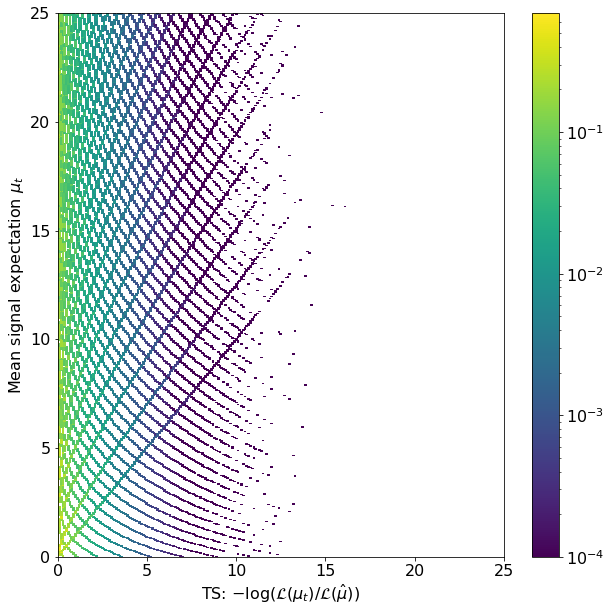

In [21]:
plot_ts(hists)

In [16]:
def build_histograms(weight_col='weight_val'):
    #print(data_tc[weight_col])
    sig = np.sum(data_tc[weight_col])*secs_per_year*years
    bkg =  sum(data_tn[weight_col]*secs_per_year*years)+sum(data_mc[weight_col]*secs_per_year*years)+\
     sum(data_mn[weight_col]*secs_per_year*years)+ sum(data_ec[weight_col]*secs_per_year*years)+\
     sum(data_en[weight_col]*secs_per_year*years)+ sum(data_eg[weight_col]*secs_per_year*years)+\
     sum(data_c[weight_col]*secs_per_year*years)
    return sig, bkg

def plot_histogram(H,xedges,yedges):
    fig = plt.figure(figsize=(20, 5),facecolor ='w')
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax = fig.add_subplot()
    X, Y = np.meshgrid(xedges, yedges)
    ax.pcolormesh(X, Y, H)
    
def make_hists_and_exps(path, weight_col='weight_val', livetime=(3600 * 24 * 365 * 7)):
    #sig_df, bkg_df, sig_exp, bkg_exp = load_sample_and_combine_with_add_statistics(
    #        from_cache=True,
    #        cached_path=path,
    #        remove_muongun=False)
    #sig_df = pd.read_csv(path+'sig_out.csv')
    #sig_exp = np.sum(sig)
    #bkg_df = pd.read_csv(path+'bkg_out.csv')
    

    sig, bkg = build_histograms(weight_col=weight_col)

    sig_exp = np.sum(sig)
    bkg_exp = np.sum(bkg)

    return sig, bkg, sig_exp, bkg_exp


def load_neyman_plane(folder='test_statistics'):
    file_names = glob(os.path.join(folder, '*.npz'))
    mus = np.asarray([float(fn.split('_')[-1].replace('.npz', '')) for fn in file_names])
    sort_idx = np.argsort(mus)
    ts_arrs = np.asarray([np.load(fn)['arr_0'] for fn in file_names])
    sorted_mus = mus[sort_idx]
    sorted_ts_arrs = ts_arrs[sort_idx]
    return sorted_mus, sorted_ts_arrs

In [17]:
def get_acc_vals_from_ts_vals(tss, alpha=0.9):
    acc_vals = np.zeros(tss.shape[0])
    n_samples = tss.shape[1]
    for i, row in enumerate(tss):
        critical_val = np.quantile(row, alpha)
        acc_vals[i] = critical_val

    return acc_vals


def calc_limits_from_trials(likelihood, bkg_samples, mus, acceptance_values, signal_expectation):
    lower_limits = []
    upper_limits = []

    for i in tqdm(range(len(bkg_samples))):
        accepted_mus = np.zeros_like(mus, dtype=int)
        ts, lmd_bf = likelihood.fit_lmd(bkg_samples[i])
        for j, mu in enumerate(mus):
            lmd = mu / signal_expectation
            bf_ts = likelihood.test_statistic_best(lmd_bf, lmd, bkg_samples[i])

            if acceptance_values[j] >= (-bf_ts):
                accepted_mus[j] = 1

        accepted_mu_mask = np.array(accepted_mus, dtype=bool)
        lower_limit = np.min(mus[accepted_mu_mask])
        upper_limit = np.max(mus[accepted_mu_mask])
        lower_limits.append(lower_limit)
        upper_limits.append(upper_limit)
    return np.array(lower_limits), np.array(upper_limits)


class LimitCalculator(object):
    def __init__(self, name, flux_systematic,
                 scan_path, df_path=None,
                 livetime=(3600 * 24 * 365 * 10),
                 random_state=1234,
                 alpha=0.9):
        self.name = name
        self.scan_path = scan_path
        self.flux_systematic = flux_systematic
        self.random_state = np.random.RandomState(random_state)
        self.livetime = livetime
        self.alpha = alpha

        if flux_systematic is True:
            #self.df_path = os.path.join(
            #    '/net/nfshome/home/mmeier/level5/loading/',
            #    'cached_dfs_aachen8yr_muongun_add_numu.hd5')
            if df_path is None:
                self.df_path = os.path.join(
                    '/net/nfshome/home/mmeier/level5/loading/',
                    'cached_dfs_aachen8yr_livetime.hd5')
            else:
                self.df_path = df_path
        else:
            self.df_path = os.path.join(
                '/home/dup193/work/double_pulse/max_test/dataframes/')
                #'cached_{}.hd5'.format(self.name))

        self.__load_acceptance_values__()
        self.__load_hists_and_exps__()

    def __load_acceptance_values__(self, return_ts=False):
        mus, tss = load_neyman_plane(self.scan_path)
        self.mus = mus
        self.acc_vals = get_acc_vals_from_ts_vals(tss, alpha=self.alpha)
        if return_ts:
            return tss
        else:
            del tss

    def __load_hists_and_exps__(self):
        if self.flux_systematic:
            if self.name.lower() == 'baseline':
                weight_col = 'weight_val'
            else:
                splitted_sys = np.append(['Weight_'], self.name.split('_'))
                weight_col = ''.join([split_i.capitalize() for split_i in splitted_sys])
        else:
            weight_col = 'weight_val'

        sig, bkg, sig_exp, bkg_exp = make_hists_and_exps(
            self.df_path, weight_col, self.livetime)
        self.sig, self.bkg = sig, bkg
        self.sig_exp, self.bkg_exp = sig_exp, bkg_exp

    def set_likelihood(self, likelihood):
        self.likelihood = likelihood

    def create_samples(self, n_samples=1000, bkg_only=True, sig_inj=None):
        if bkg_only and sig_inj is not None:
            raise ValueError('Samples can be either background only or ' +
                             'have a fixed amount of signal events injected!')
        if bkg_only:
            sig_inj = SignalInjector(self.sig, self.bkg,
                                     random_state=self.random_state,
                                     sig_exp=0.)
        elif sig_inj is not None:
            sig_inj = SignalInjector(self.sig, self.bkg,
                                     random_state=self.random_state,
                                     sig_exp=sig_inj)
        else:
            raise ValueError('Either use the bkg_only option or supply ' +
                             'an expected amount of signal!')

        self.samples = sig_inj.return_samples(n_samples)
        self.injected_signal = sig_inj.sig_exp
        return self.samples

    def calculate_limits(self, acc_vals, flux_norm, samples=None):
        if samples is None:
            samples = self.samples
        sig_exp = np.sum(self.likelihood.sig)
        self.lower_limits, self.upper_limits = calc_limits_from_trials(
            self.likelihood, samples, self.mus, acc_vals, sig_exp)

        self.lower_limits_flux = self.lower_limits / sig_exp * flux_norm
        self.upper_limits_flux = self.upper_limits / sig_exp * flux_norm

    def check_coverage(self):
        n_samples_covered = np.sum(np.logical_and(
            self.lower_limits <= self.injected_signal,
            self.upper_limits >= self.injected_signal))
        n_samples_total = len(self.lower_limits)
        return n_samples_covered / n_samples_total

    @property
    def average_upper_limit(self):
        return np.mean(self.upper_limits_flux)

    @property
    def average_lower_limit(self):
        return np.mean(self.lower_limits_flux)

In [18]:
lc_1 = LimitCalculator(
    'baseline', flux_systematic=True,
     scan_path='/home/dup193/work/double_pulse/onebin_test/ts_dist/',
     df_path='/home/dup193/work/double_pulse/onebin_test/dataframes/',
     livetime=1)

In [19]:
likelihood = BinnedPoissonLikelihood(lc_1.sig, lc_1.bkg, lc_1.random_state)
lc_1.set_likelihood(likelihood)

In [20]:
tss_1 = lc_1.__load_acceptance_values__(return_ts=True)
mus = lc_1.mus

In [21]:
def load_ts(tss):
    ts_bins = np.linspace(0, 200, 2001)
    ts_bins = ts_bins - np.diff(ts_bins)[0] / 2.
    hists = []
    for i in range(len(mus)):
        hist_i, edges = np.histogram(tss[i], bins=ts_bins, density=False)
        hist_i = hist_i / float(np.sum(hist_i))
        hists.append(hist_i)
    return hists

In [22]:
ts1_hist = load_ts(tss_1)

In [23]:
samples_bkg_1 = lc_1.create_samples()

In [24]:
def find_int_trials(samples):
    print('max',np.max(samples),np.argmax(samples))
    print('min',np.min(samples),np.argmin(samples))

In [25]:
find_int_trials(samples_bkg_1)

max 6 24
min 0 0


In [28]:
samples_bkg_1

array([0, 1, 2, 0, 3, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 2, 3, 0, 0, 2, 0, 1,
       1, 2, 6, 1, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 1, 3, 3, 0, 1, 2, 2, 3,
       2, 0, 1, 1, 0, 3, 1, 4, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 3, 1,
       0, 1, 2, 0, 4, 1, 5, 3, 1, 1, 1, 3, 2, 1, 1, 1, 1, 0, 1, 1, 0, 6,
       1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 0, 1, 3, 0, 1, 2, 0, 0, 1, 0, 0,
       1, 1, 2, 2, 2, 2, 4, 2, 1, 0, 3, 0, 1, 0, 1, 1, 3, 0, 4, 2, 0, 0,
       2, 1, 0, 2, 1, 0, 0, 0, 0, 3, 3, 1, 1, 0, 0, 0, 1, 1, 0, 3, 3, 2,
       1, 0, 3, 0, 4, 1, 1, 2, 2, 2, 1, 0, 3, 1, 2, 1, 4, 0, 3, 1, 0, 2,
       0, 2, 0, 2, 3, 4, 3, 2, 1, 2, 1, 1, 0, 4, 0, 0, 1, 1, 2, 2, 2, 2,
       0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 2,
       3, 0, 0, 1, 2, 2, 0, 0, 0, 0, 1, 3, 3, 0, 2, 2, 0, 1, 0, 2, 0, 1,
       0, 0, 1, 2, 0, 3, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0,
       1, 0, 1, 0, 3, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 3, 2, 0, 0, 1,
       1, 1, 2, 0, 0, 1, 3, 1, 1, 0, 1, 2, 0, 1, 4,

(array([340., 356., 196.,  71.,  27.,  10.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 6 Patch objects>)

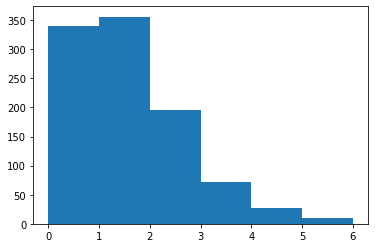

In [27]:
plt.hist(samples_bkg_1, bins = 6)

In [33]:
def plot_ts_acval(limit_calculator,hists,samples_bkg,n1,n2):
    fig = plt.figure(figsize=(10, 10),facecolor ='w')
    vmin = np.min([np.min(hist) for hist in hists])
    vmax = np.max([np.max(hist) for hist in hists])

    ts_vals = []
    for mu in mus:
        lmd = mu / limit_calculator.sig_exp
        ts_val, lmd = likelihood.fit_lmd_best(mu, samples_bkg[n1])
        ts_vals.append(-ts_val)
    
    ts_vals2 = []
    for mu in mus:
        lmd = mu / limit_calculator.sig_exp
        ts_val, lmd = likelihood.fit_lmd_best(mu, samples_bkg[n2])
        ts_vals2.append(-ts_val)

    fig, ax = plt.subplots(figsize=(10, 10),facecolor ='w')
    for i in range(len(mus) - 1):
        Xe, Ye = np.meshgrid(ts_bins, [mus[i], mus[i+1]])
        im = ax.pcolormesh(Xe, Ye, np.atleast_2d(hists[i]), norm=LogNorm())# , vmin=vmin+1e-4, vmax=vmax
    plt.plot(ts_vals, mus, color='k', label='Scan for example experiment')
    plt.plot(ts_vals2, mus, color='k', ls='--', label='Scan for example experiment')
    plt.plot(limit_calculator.acc_vals, mus, color='r', label='Critical values')
    ax.set_xlabel('TS: $-\log(\mathcal{L}(\mu_t) / \mathcal{L}(\hat{\mu}))$')
    ax.set_ylabel(r'Mean signal expectation $\mu_t$')
    plt.xlim(0, 20)
    ylim_lower = 0
    ylim_upper = 20
    plt.ylim(ylim_lower, ylim_upper)
    plt.legend()
    ax2 = ax.twinx()
    ax2.set_ylabel(r'Mean rel. $\nu_{\tau}$ flux norm $\lambda_t$')
    ax2.plot(ts_vals2, mus/limit_calculator.sig_exp, color='k', ls='--', label='Scan for example experiment')
    ax2.set_ylim(ylim_lower/limit_calculator.sig_exp, ylim_upper/limit_calculator.sig_exp)
    plt.colorbar(im, pad=0.15)

<Figure size 720x720 with 0 Axes>

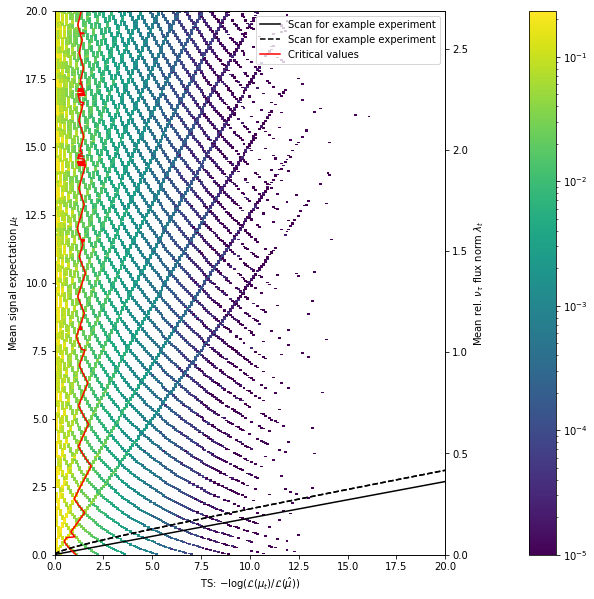

In [34]:
plot_ts_acval(lc_1,ts1_hist,samples_bkg_1,0,1)

In [114]:
flux_norm = 2.1467
#flux_norm = 2.23
#flux_norm = 1.36
lc_1.calculate_limits(lc_1.acc_vals, flux_norm)

100%|██████████| 1000/1000 [00:14<00:00, 69.41it/s]


In [116]:
print(lc_1.average_upper_limit)
print(np.std(lc_1.upper_limits_flux))

0.9601761459178131
0.48774591782170595


In [117]:
np.sum(lc_1.lower_limits_flux==0)/len(lc_1.lower_limits_flux)

0.963

Text(0.5, 1.0, 'Fitting with $E^{-2.88}$')

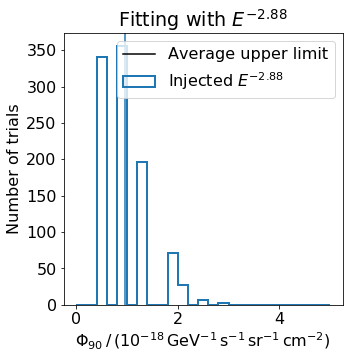

In [119]:
ul_bins = np.linspace(0, 5, 26)
fig = plt.figure(figsize=(5, 5),facecolor ='w')

plt.hist(lc_1.upper_limits_flux, bins=ul_bins, histtype='step', lw=2, label='Injected $E^{-2.88}$')

plt.axvline(lc_1.average_upper_limit)

plt.plot([], [], color='k', ls='-', label='Average upper limit')
plt.legend()
plt.xlabel('$\Phi_{90} \,/ \, (10^{-18} \, \mathrm{GeV}^{-1} \, \mathrm{s}^{-1} \, \mathrm{sr}^{-1} \, \mathrm{cm}^{-2})$')
plt.ylabel('Number of trials')
plt.title('Fitting with $E^{-2.88}$')